<a href="https://colab.research.google.com/github/noelgith/covid-diet/blob/main/aitteam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from scipy import stats as st
import seaborn as sns # For pairplots and heatmaps
import matplotlib.pyplot as plt
import altair as alt
from vega_datasets import data

In [3]:
df = pd.read_csv('/content/Food_Supply_Quantity_kg_Data.csv')

In [4]:
df = df.dropna()

In [ ]:
obese = df['Obesity']

In [ ]:
obese = obese.dropna()

In [ ]:
obese.isna().sum()

0

In [ ]:
recovered =(df['Recovered']*df['Population'])

In [ ]:
deaths = df['Deaths']*df['Population']

In [ ]:
st.ttest_ind(obese, recovered, equal_var = False)

Ttest_indResult(statistic=-3.8832882268708717, pvalue=0.0001529365199890348)

In [ ]:
data = {'Obese':obese, 'Recovered':recovered, 'Deaths':deaths}

In [ ]:
odf = pd.DataFrame(data)

In [ ]:
odf.head()

,Obese,Recovered,Deaths
0,4.5,4802700.0,240800.0
1,22.3,5087500.0,144600.0
2,26.6,7433000.0,290900.0
3,6.8,1847500.0,47500.0
5,28.5,177205900.0,4911000.0


In [ ]:
odf['Obese'] = odf['Obese'].astype('object')
odf['Recovered'] = odf['Recovered'].astype('object')
odf['Deaths'] = odf['Deaths'].astype('object')

In [ ]:
odf.dtypes

Obese        object
Recovered    object
Deaths       object
dtype: object

In [ ]:
low_obese = odf[odf['Obese']<18.0]
mid_obese = odf[(odf['Obese']>18.0) & (odf['Obese']<35.0)]
high_obese = odf[odf['Obese']>35.0]

In [ ]:
low_obese = odf[odf['Obese']<25.0]
high_obese = odf[odf['Obese']>=25.0]

In [ ]:
df.head()

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population
0,Afghanistan,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,7.5828,0.0728,0.2057,0.0700,0.2953,0.0574,0.8802,0.3078,1.3489,0.0,0.0770,0.5345,6.7642,40.5645,4.5,29.8,0.142134,0.006186,0.123374,0.012574,38928000.0
1,Albania,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,0.1123,0.2324,0.9377,0.2380,0.0008,1.8096,0.1055,1.5367,0.0,0.1515,0.3261,11.7753,31.2304,22.3,6.2,2.967301,0.050951,1.792636,1.123714,2838000.0
2,Algeria,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,0.1671,0.0870,0.3493,0.4783,0.0557,4.1340,0.2216,1.8342,0.0,0.1152,1.0310,11.6484,40.3651,26.6,3.9,0.244897,0.006558,0.167572,0.070767,44357000.0
3,Angola,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,0.1165,0.1550,0.4186,0.6507,0.0009,18.1102,0.0508,1.8495,0.0,0.0061,0.6463,2.3041,45.0722,6.8,25,0.061687,0.001461,0.056808,0.003419,32522000.0
5,Argentina,4.2672,0.2234,19.3454,0.0,8.4102,0.9979,0.4693,6.0435,7.0421,10.2328,0.0000,0.3779,0.0116,0.0528,0.0122,3.0420,0.4378,3.0536,0.0,0.0200,0.9541,4.3503,30.6559,28.5,4.6,4.356147,0.108227,3.905192,0.342729,45377000.0


In [5]:
df = df.drop('Unit (all except Population)',axis=1)

### **Performing Sperman's correlation test**

1. Correlation between diet variables and Obesity.

In [6]:
df.columns

Index(['Country', 'Alcoholic Beverages', 'Animal fats', 'Animal Products',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners',
       'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables',
       'Vegetal Products', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Population'],
      dtype='object')

In [ ]:
corr_df = df.drop(['Country','Active','Undernourished', 'Confirmed', 'Deaths',
       'Recovered', 'Population'],axis=1)

In [ ]:
corr_df.columns

Index(['Alcoholic Beverages', 'Animal fats', 'Animal Products',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners',
       'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables',
       'Vegetal Products', 'Obesity'],
      dtype='object')

In [11]:
#function to find the correlation
def display_correlation(df):
    r = df.corr(method="spearman") #spearman's correlation call
    plt.figure(figsize=(15,12))
    heatmap = sns.heatmap(df.corr(), vmin=-1, 
                      vmax=1, annot=True)
    plt.title("Spearman Correlation")
    return(r)

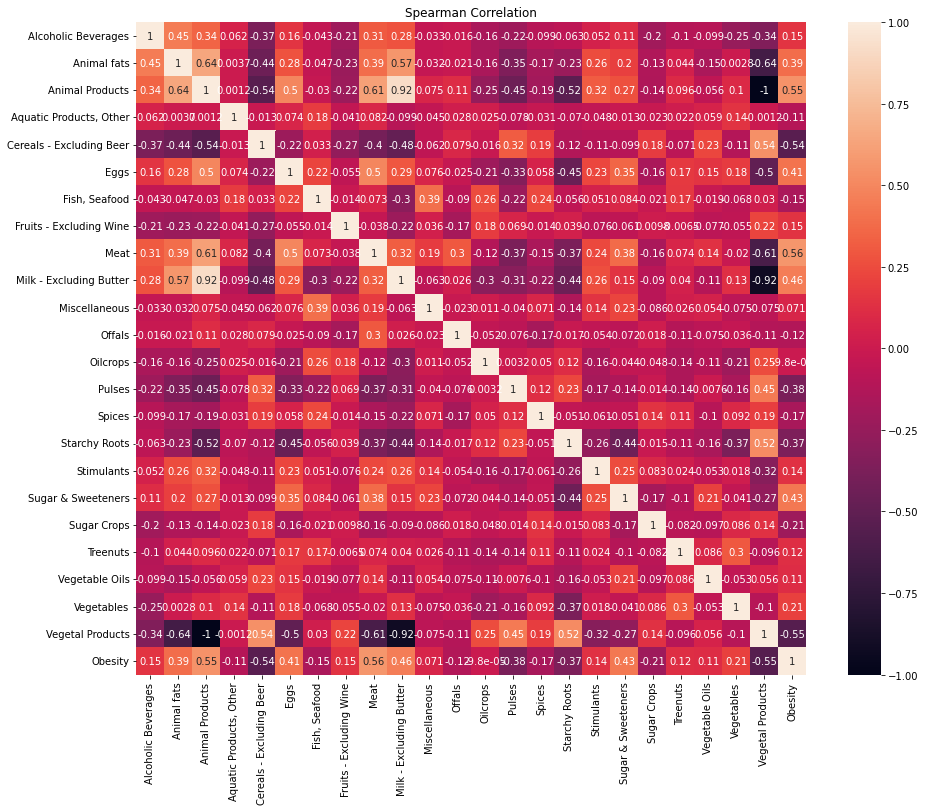

In [ ]:
#calling the function display_correlation
r_simple=display_correlation(corr_df) 

In [ ]:
alt.Chart(corr_df).mark_point().encode(
    x = 'Obesity',
    y = 'Vegetal Products'
)

alt.Chart(...)

In [ ]:


alt.Chart(corr_df).mark_point().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    #color='species:N'
).properties(
    width=200,
    height=200
).repeat(
    row=['Obesity'],
    column=['Vegetal Products', 'Sugar & Sweeteners','Starchy Roots', 'Animal fats', 'Animal Products',
       'Eggs', 'Meat',
       'Milk - Excluding Butter',
       'Pulses']
)

alt.RepeatChart(...)

Observation: attributes that are correlated to the attribute 'Obesity' are Vegetable Products, Sugar&Sweetners, Starchy Roots, Pulses, Milk-excluding butter, Meat, Eggs, Animal Products, Animal Fats.

2. Correlation between diet variables and 'Undernourished'

In [7]:
df['Undernourished'] = df['Undernourished'].map(lambda x: '2.4' if x == '<2.5' else x).astype('float64')

In [8]:
new_df = df.drop(['Country','Active','Obesity', 'Confirmed', 'Deaths',
       'Recovered', 'Population'],axis=1)

In [9]:
new_df.columns

Index(['Alcoholic Beverages', 'Animal fats', 'Animal Products',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners',
       'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables',
       'Vegetal Products', 'Undernourished'],
      dtype='object')

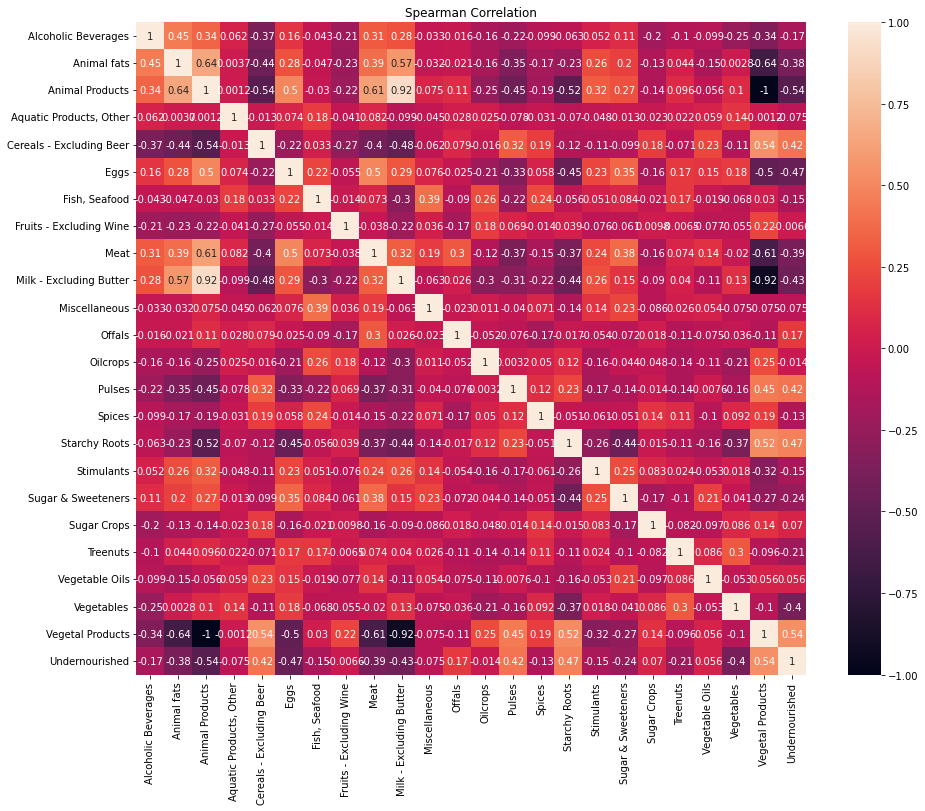

In [12]:
nourish = display_correlation(new_df)

Observation: The variables that are highly correlated with 'Undernourished' are Vegetable products, Vegetables, Starchy Roots, Pulses, Milk-excluding butter, Meat, Eggs, Cereals, Animal Products, Animal Fats

In [14]:
alt.Chart(new_df).mark_point().encode(
    alt.X(alt.repeat("column"), type='quantitative'),
    alt.Y(alt.repeat("row"), type='quantitative'),
    color=alt.value('red')
).properties(
    width=200,
    height=200
).repeat(
    row=['Undernourished'],
    column=['Vegetal Products','Fruits - Excluding Wine','Starchy Roots', 'Animal fats', 'Animal Products',
       'Eggs', 'Meat',
       'Milk - Excluding Butter',
       'Pulses']
)

alt.RepeatChart(...)

## 2. Linear Regression

In [ ]:
#separate the other attributes from the predicting attribute
x = corr_df.drop('Obesity',axis=1)
#separte the predicting attribute into Y for model training 
y = corr_df['Obesity']

In [ ]:
# importing module
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(x,y)

LinearRegression()